In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

In [3]:
import torchxrayvision as xrv

In [12]:
d_nih = xrv.datasets.NIH_Dataset(imgpath="/lustre04/scratch/cohenjos/NIH/images-224",
                                 views=["PA","AP"], unique_patients=False)


In [13]:
d_nih

{'Atelectasis': {0.0: 100561, 1.0: 11559},
 'Cardiomegaly': {0.0: 109344, 1.0: 2776},
 'Consolidation': {0.0: 107453, 1.0: 4667},
 'Edema': {0.0: 109817, 1.0: 2303},
 'Effusion': {0.0: 98803, 1.0: 13317},
 'Emphysema': {0.0: 109604, 1.0: 2516},
 'Fibrosis': {0.0: 110434, 1.0: 1686},
 'Hernia': {0.0: 111893, 1.0: 227},
 'Infiltration': {0.0: 92226, 1.0: 19894},
 'Mass': {0.0: 106338, 1.0: 5782},
 'Nodule': {0.0: 105789, 1.0: 6331},
 'Pleural_Thickening': {0.0: 108735, 1.0: 3385},
 'Pneumonia': {0.0: 110689, 1.0: 1431},
 'Pneumothorax': {0.0: 106818, 1.0: 5302}}


NIH_Dataset num_samples=112120 views=['PA', 'AP']

In [14]:
d_nih.csv.iloc[0]

index                                         0
Image Index                    00000001_000.png
Finding Labels                     Cardiomegaly
Follow-up #                                   0
Patient ID                                    1
Patient Age                                  57
Patient Gender                                M
View Position                                PA
OriginalImage[Width                        2682
Height]                                    2749
OriginalImagePixelSpacing[x               0.143
y]                                        0.143
has_masks                                 False
Name: 0, dtype: object

{'Atelectasis': 0.0,
 'Cardiomegaly': 1.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

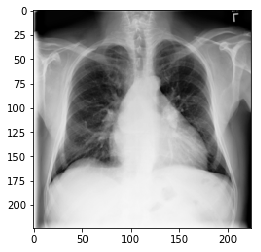

In [15]:
sample = d_nih[0]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_nih.pathologies,sample["lab"]))

In [44]:
d_pc = xrv.datasets.PC_Dataset(imgpath="/lustre04/scratch/cohenjos/PC/images-224",
                                 views=["PA","AP"], unique_patients=False)


In [45]:
d_pc

{'Atelectasis': {0.0: 91789, 1.0: 4428},
 'Bronchiectasis': {0.0: 94704, 1.0: 1513},
 'Cardiomegaly': {0.0: 87438, 1.0: 8779},
 'Consolidation': {0.0: 95059, 1.0: 1158},
 'Edema': {0.0: 95754, 1.0: 463},
 'Effusion': {0.0: 92255, 1.0: 3962},
 'Emphysema': {0.0: 95254, 1.0: 963},
 'Fibrosis': {0.0: 95534, 1.0: 683},
 'Flattened Diaphragm': {0.0: 95683, 1.0: 534},
 'Fracture': {0.0: 93518, 1.0: 2699},
 'Granuloma': {0.0: 93739, 1.0: 2478},
 'Hernia': {0.0: 94686, 1.0: 1531},
 'Infiltration': {0.0: 86987, 1.0: 9230},
 'Mass': {0.0: 95376, 1.0: 841},
 'Nodule': {0.0: 92450, 1.0: 3767},
 'Pleural_Thickening': {0.0: 92978, 1.0: 3239},
 'Pneumonia': {0.0: 92324, 1.0: 3893},
 'Pneumothorax': {0.0: 95922, 1.0: 295}}


PC_Dataset num_samples=96217

In [18]:
sample = d_pc[0]

In [19]:
tr = xrv.datasets.XRayResizer(224)

In [20]:
data_transforms = torchvision.transforms.Compose([
        xrv.datasets.ToPILImage(),
        torchvision.transforms.RandomAffine(45, translate=(0.15, 0.15), scale=(0.85, 1.15)),
        torchvision.transforms.ToTensor()
    ])

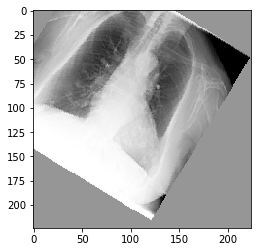

In [21]:
a = data_transforms(tr(sample["img"]))
plt.imshow(a[0], cmap="Greys_r")

In [22]:
d_chex = xrv.datasets.CheX_Dataset(imgpath="/lustre03/project/6008064/jpcohen/chexpert/CheXpert-v1.0-small",
                                   csvpath="/lustre03/project/6008064/jpcohen/chexpert/CheXpert-v1.0-small/train.csv",
                                 views=["PA","AP"], unique_patients=False)


In [23]:
d_chex

{'Atelectasis': {0.0: 17621, 1.0: 29718},
 'Cardiomegaly': {0.0: 22645, 1.0: 23384},
 'Consolidation': {0.0: 30463, 1.0: 12982},
 'Edema': {0.0: 29449, 1.0: 49674},
 'Effusion': {0.0: 34376, 1.0: 76894},
 'Enlarged Cardiomediastinum': {0.0: 26527, 1.0: 9186},
 'Fracture': {0.0: 18111, 1.0: 7434},
 'Lung Lesion': {0.0: 17523, 1.0: 7040},
 'Lung Opacity': {0.0: 20165, 1.0: 94207},
 'Pleural Other': {0.0: 17166, 1.0: 2503},
 'Pneumonia': {0.0: 18105, 1.0: 4674},
 'Pneumothorax': {0.0: 54165, 1.0: 17693},
 'Support Devices': {0.0: 21757, 1.0: 99747}}


CheX_Dataset num_samples=191010 views=['PA', 'AP']

In [24]:
d_nih2 = xrv.datasets.NIH_Google_Dataset(imgpath="/lustre04/scratch/cohenjos/NIH/images-224",
                                 views=["PA","AP"], unique_patients=False)

In [25]:
d_nih2

{'Fracture': {0.0: 4190, 1.0: 186},
 'Lung Opacity': {0.0: 2210, 1.0: 2166},
 'Nodule or mass': {0.0: 3771, 1.0: 605},
 'Pneumothorax': {0.0: 4138, 1.0: 238}}


NIH_Google_Dataset num_samples=4376 views=['PA', 'AP']

{'Atelectasis': 1.0, 'Cardiomegaly': 0.0, 'Consolidation': 0.0, 'Edema': 0.0}

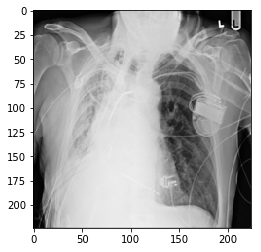

In [26]:
sample = d_nih2[0]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_nih.pathologies,sample["lab"]))

In [27]:
d_mimic_chex = xrv.datasets.MIMIC_Dataset(#datadir="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/files",
          imgpath="/lustre04/scratch/cohenjos/MIMIC/images-224/files",
          csvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-chexpert.csv.gz",
          metacsvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-metadata.csv.gz",
          views=["PA","AP"], unique_patients=False)


In [28]:
d_mimic_chex

{'Atelectasis': {0.0: 82269, 1.0: 48790},
 'Cardiomegaly': {0.0: 92752, 1.0: 47673},
 'Consolidation': {0.0: 88179, 1.0: 11525},
 'Edema': {0.0: 101747, 1.0: 29331},
 'Effusion': {0.0: 102492, 1.0: 57721},
 'Enlarged Cardiomediastinum': {0.0: 84746, 1.0: 7657},
 'Fracture': {0.0: 81584, 1.0: 4781},
 'Lung Lesion': {0.0: 81685, 1.0: 6632},
 'Lung Opacity': {0.0: 83336, 1.0: 54769},
 'Pleural Other': {0.0: 81202, 1.0: 2083},
 'Pneumonia': {0.0: 96223, 1.0: 17222},
 'Pneumothorax': {0.0: 120294, 1.0: 11235},
 'Support Devices': {0.0: 84023, 1.0: 61717}}


MIMIC_Dataset num_samples=243324 views=['PA', 'AP']

In [29]:
d_mimic_negbio = xrv.datasets.MIMIC_Dataset(#datadir="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/files",
          imgpath="/lustre04/scratch/cohenjos/MIMIC/images-224/files",
          csvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-negbio.csv.gz",
          metacsvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-metadata.csv.gz",
          views=["PA","AP"], unique_patients=False)


In [30]:
d_mimic_negbio

{'Atelectasis': {0.0: 85531, 1.0: 48972},
 'Cardiomegaly': {0.0: 96524, 1.0: 41654},
 'Consolidation': {0.0: 92945, 1.0: 11379},
 'Edema': {0.0: 106348, 1.0: 28886},
 'Effusion': {0.0: 106469, 1.0: 56697},
 'Enlarged Cardiomediastinum': {0.0: 88454, 1.0: 7514},
 'Fracture': {0.0: 85780, 1.0: 4093},
 'Lung Lesion': {0.0: 85384, 1.0: 6518},
 'Lung Opacity': {0.0: 88199, 1.0: 54556},
 'Pleural Other': {0.0: 84826, 1.0: 2073},
 'Pneumonia': {0.0: 100122, 1.0: 16565},
 'Pneumothorax': {0.0: 124767, 1.0: 10045},
 'Support Devices': {0.0: 87817, 1.0: 60871}}


MIMIC_Dataset num_samples=243324 views=['PA', 'AP']

{'Atelectasis': 0.0,
 'Cardiomegaly': 0.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Enlarged Cardiomediastinum': 0.0,
 'Fracture': 0.0,
 'Lung Lesion': 0.0,
 'Lung Opacity': 0.0,
 'Effusion': 0.0,
 'Pleural Other': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0,
 'Support Devices': 0.0}

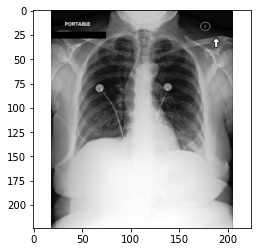

In [31]:
sample = d_mimic_chex[15011]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_mimic_chex.pathologies,sample["lab"]))

In [33]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

In [35]:
d_openi = xrv.datasets.Openi_Dataset(imgpath="/lustre03/project/6008064/jpcohen/OpenI/images",
                                    transform=transform,
                                    unique_patients=False)

In [36]:
d_openi

{'Atelectasis': {0.0: 2996, 1.0: 271},
 'Calcified Granuloma': {0.0: 3074, 1.0: 193},
 'Cardiomegaly': {0.0: 3082, 1.0: 185},
 'Edema': {0.0: 3217, 1.0: 50},
 'Effusion': {0.0: 3147, 1.0: 120},
 'Emphysema': {0.0: 3183, 1.0: 84},
 'Fibrosis': {0.0: 3250, 1.0: 17},
 'Fracture': {0.0: 3189, 1.0: 78},
 'Granuloma': {0.0: 2914, 1.0: 353},
 'Hernia': {0.0: 3226, 1.0: 41},
 'Infiltration': {0.0: 3201, 1.0: 66},
 'Lung Lesion': {0.0: 3264, 1.0: 3},
 'Lung Opacity': {0.0: 2940, 1.0: 327},
 'Mass': {0.0: 3261, 1.0: 6},
 'Nodule': {0.0: 3199, 1.0: 68},
 'Pleural_Thickening': {0.0: 3237, 1.0: 30},
 'Pneumonia': {0.0: 3199, 1.0: 68},
 'Pneumothorax': {0.0: 3253, 1.0: 14}}


Openi_Dataset num_samples=3267

{'Atelectasis': 0.0,
 'Calcified Granuloma': 0.0,
 'Cardiomegaly': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Fracture': 0.0,
 'Granuloma': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Lung Lesion': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Lung Opacity': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

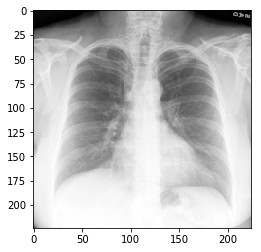

In [37]:
sample = d_openi[0]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_openi.pathologies,sample["lab"]))

In [42]:
#RSNA_Pneumonia_Dataset
d_rsna = xrv.datasets.RSNA_Pneumonia_Dataset(imgpath="/home/cohenjos/projects/rpp-bengioy/jpcohen/kaggle-pneumonia/stage_2_train_images_jpg", 
                                            views=["PA","AP"],
                                            unique_patients=False)


In [43]:
d_rsna

{'Lung Opacity': {0.0: 20672, 1.0: 6012}, 'Pneumonia': {0.0: 20672, 1.0: 6012}}


RSNA_Pneumonia_Dataset num_samples=26684 views=['PA', 'AP']

In [38]:
pathologies = [  'Atelectasis',
                 'Consolidation',
                 'Infiltration',
                 'Pneumothorax',
                 'Edema',
                 'Emphysema',
                 'Fibrosis',
                 'Effusion',
                 'Pneumonia',
                 'Pleural_Thickening',
                 'Cardiomegaly',
                 'Nodule',
                 'Mass',
                 'Hernia',
                 'Lung Lesion',
                 'Fracture',
                 'Lung Opacity',
                 'Enlarged Cardiomediastinum'
                ]

In [39]:
print(d_nih.__class__)
xrv.datasets.relabel_dataset(pathologies, d_nih)
print(d_pc.__class__)
xrv.datasets.relabel_dataset(pathologies, d_pc)
print(d_chex.__class__)
xrv.datasets.relabel_dataset(pathologies, d_chex)
print(d_mimic_chex.__class__)
xrv.datasets.relabel_dataset(pathologies, d_mimic_chex)

<class 'torchxrayvision.datasets.NIH_Dataset'>
Lung Lesion doesn't exist. Adding nans instead.
Fracture doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.
<class 'torchxrayvision.datasets.PC_Dataset'>
{'Bronchiectasis', 'Granuloma', 'Pleural Thickening', 'Flattened Diaphragm'} will be dropped
Lung Lesion doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.
<class 'torchxrayvision.datasets.CheX_Dataset'>
{'Support Devices', 'Pleural Other'} will be dropped
Infiltration doesn't exist. Adding nans instead.
Emphysema doesn't exist. Adding nans instead.
Fibrosis doesn't exist. Adding nans instead.
Pleural_Thickening doesn't exist. Adding nans instead.
Nodule doesn't exist. Adding nans instead.
Mass doesn't exist. Adding nans instead.
Hernia doesn't exist. Adding nans instead.
<class 'torchxrayvision.da

In [40]:
dd = xrv.datasets.Merge_Dataset([d_nih, d_pc, d_chex, d_mimic_chex])

In [41]:
dd

{'Atelectasis': {0.0: 292240, 1.0: 94495},
 'Cardiomegaly': {0.0: 312179, 1.0: 82612},
 'Consolidation': {0.0: 321154, 1.0: 30332},
 'Edema': {0.0: 336767, 1.0: 81771},
 'Effusion': {0.0: 327926, 1.0: 151894},
 'Emphysema': {0.0: 204858, 1.0: 3479},
 'Enlarged Cardiomediastinum': {0.0: 111273, 1.0: 16843},
 'Fibrosis': {0.0: 205968, 1.0: 2369},
 'Fracture': {0.0: 193213, 1.0: 14914},
 'Hernia': {0.0: 206579, 1.0: 1758},
 'Infiltration': {0.0: 179213, 1.0: 29124},
 'Lung Lesion': {0.0: 99208, 1.0: 13672},
 'Lung Opacity': {0.0: 103501, 1.0: 148976},
 'Mass': {0.0: 201714, 1.0: 6623},
 'Nodule': {0.0: 198239, 1.0: 10098},
 'Pleural_Thickening': {0.0: 201713, 1.0: 6624},
 'Pneumonia': {0.0: 317341, 1.0: 27220},
 'Pneumothorax': {0.0: 377199, 1.0: 34525}}


Merge_Dataset num_samples=642671